# Nama : M.Ilham Ramadani
NIM  : 09011381722143

# Sistem Pengendali Suhu Ruangan Kantor



Ada 3 variabel fuzzy yang akan dimodelkan, yaitu: 
### 1. Jumlah Orang
  Jumlah Orang terdiri-atas 3 himpunan fuzzy, yaitu: sedikit, sedang dan banyak.
- Jumlah Orang sedikit
$$ Jumlah Orang sedikit [x] = 
\begin{cases}
    1 & ; x \leq 5\\
    \frac{(20-x)}{(20-5)} & ; 5 \leq  x \leq\ 20 \\
    0 & ; x \geq 20
\end{cases}
$$

- Jumlah Orang sedang
$$ Jumlah Orang sedang [x] = 
\begin{cases}
    0 & ; x \leq 5\\
    \frac{(x-5)}{(20-5)} & ; 5 \leq  x \leq\ 20 \\
     \frac{(30-x)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
\end{cases}
$$

- Jumlah Orang banyak
$$ Jumlah Orang banyak [x] = 
\begin{cases}
    0 & ; x \leq 20\\
    \frac{(x-20)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
    1 & ; x \geq 30
\end{cases}
$$

### 2.  Suhu Eksternal
  Suhu Eksternal terdiri-atas 3 himpunan fuzzy, yaitu: sejuk, sedang dan panas.
- Suhu Eksternal sejuk
$$ Suhu Eksternal sejuk [x] = 
\begin{cases}
    1 & ; x \leq 10\\
    \frac{(10-x)}{(20-10)} & ; 10 \leq  x \leq\ 20 \\
    0 & ; x \geq 20
\end{cases}
$$

- Suhu Eksternal sedang
$$ Suhu Eksternal sedang [x] = 
\begin{cases}
    0 & ; x \leq 10\\
    \frac{(x-10)}{(20-10)} & ; 10 \leq  x \leq\ 20 \\
     \frac{(30-x)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
\end{cases}
$$

- Suhu Eksternal panas
$$ Suhu Eksternal panas [x] = 
\begin{cases}
    0 & ; x \leq 20\\
    \frac{(x-20)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
    1 & ; x \geq 30
\end{cases}
$$
### 3. Suhu Ruangan
Produksi barang terdiri-atas 3 himpunan fuzzy, yaitu: normal, sedang dan dingin. 
- Suhu Ruangan normal
$$ Suhu Ruangan normal [x] = 
\begin{cases}
    1 & ; x \leq 10\\
    \frac{(10-x)}{(20-10)} & ; 10 \leq  x \leq\ 20 \\
    0 & ; x \geq 20
\end{cases}
$$

- Suhu Ruangan sedang
$$ Jumlah Ruangan sedang [x] = 
\begin{cases}
    0 & ; x \leq 10\\
    \frac{(x-10)}{(20-10)} & ; 10 \leq  x \leq\ 20 \\
     \frac{(30-x)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
\end{cases}
$$

- Suhu Ruangan dingin
$$ Suhu Ruangan dingin [x] = 
\begin{cases}
    0 & ; x \leq 20\\
    \frac{(x-20)}{(30-20)} & ; 20 \leq  x \leq\ 30 \\
    1 & ; x \geq 30
\end{cases}
$$

# menyelesaikan case fuzzy

In [144]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### menentukan variabel input

In [145]:
jumlah_orang = ctrl.Antecedent(np.arange(5,31,1),'jumlah_orang')
suhu_eksternal = ctrl.Antecedent(np.arange(10,31,1),'suhu_eksternal')

### menentukan variabel output

In [146]:
suhu_ruangan = ctrl.Consequent(np.arange(18,31,1),'suhu_ruangan')

### Membership Function dari jumlah orang

In [147]:
jumlah_orang['sedikit'] = fuzz.trimf(jumlah_orang.universe,[5,5,20])
jumlah_orang['sedang'] = fuzz.trimf(jumlah_orang.universe,[5,20,30])
jumlah_orang['banyak'] = fuzz.trimf(jumlah_orang.universe,[20,30,30])

### Membership Function dari suhu eksternal

In [148]:
suhu_eksternal['sejuk'] = fuzz.trimf(suhu_eksternal.universe,[10,10,20])
suhu_eksternal['sedang'] = fuzz.trimf(suhu_eksternal.universe,[10,20,30])
suhu_eksternal['panas'] = fuzz.trimf(suhu_eksternal.universe,[20,30,30])

### Membership Function dari suhu ruangan

In [149]:
suhu_ruangan['normal'] = fuzz.trimf(suhu_ruangan.universe,[18,18,24])
suhu_ruangan['sedang'] = fuzz.trimf(suhu_ruangan.universe,[18,24,30])
suhu_ruangan['dingin'] = fuzz.trimf(suhu_ruangan.universe,[24,30,30])

C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


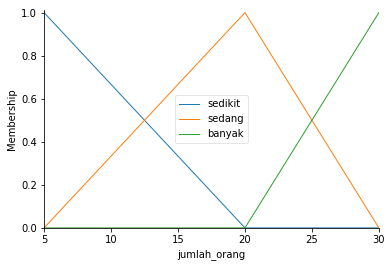

In [150]:
jumlah_orang.view()

C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


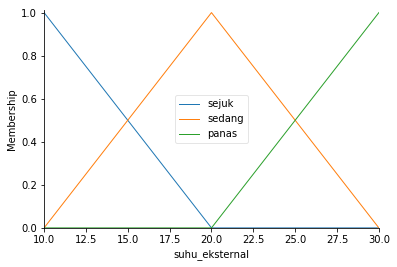

In [151]:
suhu_eksternal.view()

C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


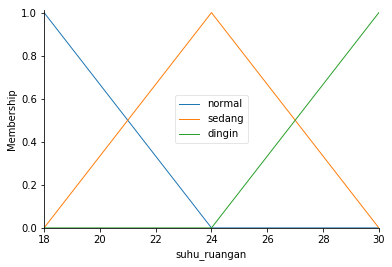

In [152]:
suhu_ruangan.view()

### Rule Fuzzy

In [174]:
rule1 = ctrl.Rule(jumlah_orang['sedikit'] & suhu_eksternal['sejuk'],suhu_ruangan['normal'])
rule2 = ctrl.Rule(jumlah_orang['sedang'] & suhu_eksternal['sejuk'],suhu_ruangan['normal'])
rule3 = ctrl.Rule(jumlah_orang['banyak'] & suhu_eksternal['sejuk'],suhu_ruangan['normal'])
rule4 = ctrl.Rule(jumlah_orang['sedikit'] & suhu_eksternal['sedang'],suhu_ruangan['sedang'])
rule5 = ctrl.Rule(jumlah_orang['sedang'] & suhu_eksternal['sedang'],suhu_ruangan['sedang'])
rule6 = ctrl.Rule(jumlah_orang['banyak'] & suhu_eksternal['sedang'],suhu_ruangan['dingin'])
rule7 = ctrl.Rule(jumlah_orang['sedikit'] & suhu_eksternal['panas'],suhu_ruangan['dingin'])
rule8 = ctrl.Rule(jumlah_orang['sedang'] & suhu_eksternal['panas'],suhu_ruangan['dingin'])
rule9 = ctrl.Rule(jumlah_orang['banyak'] & suhu_eksternal['panas'],suhu_ruangan['dingin'])

### Simulasi

### jika disebuah ruangan terdapat 12 orang dengan suhu diluar ruangan 30

In [154]:
suhuac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [155]:
suhuac = ctrl.ControlSystemSimulation(suhuac_ctrl)

In [156]:
suhuac.input['jumlah_orang']=12

In [157]:
suhuac.input['suhu_eksternal']=30

In [158]:
suhuac.compute()

In [159]:
print(suhuac.output['suhu_ruangan'])

27.703030303030307


C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


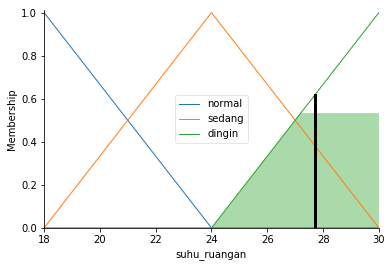

In [160]:
suhu_ruangan.view(sim=suhuac)

### jika disebuah ruangan terdapat 6 orang dengan suhu diluar ruangan 18 

In [161]:
suhuac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [162]:
suhuac = ctrl.ControlSystemSimulation(suhuac_ctrl)
suhuac.input['jumlah_orang']=6
suhuac.input['suhu_eksternal']=18
suhuac.compute()
print(suhuac.output['suhu_ruangan'])

23.875565610859738


C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


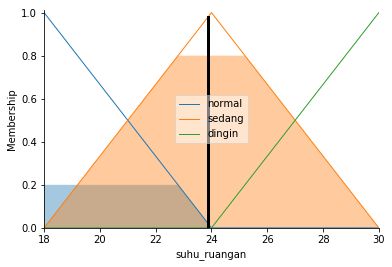

In [163]:
suhu_ruangan.view(sim=suhuac)

### jika disebuah ruangan terdapat 35 orang dengan suhu diluar ruangan 30

In [164]:
suhuac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [165]:
suhuac = ctrl.ControlSystemSimulation(suhuac_ctrl)
suhuac.input['jumlah_orang']=35
suhuac.input['suhu_eksternal']=30
suhuac.compute()
print(suhuac.output['suhu_ruangan'])

28.0


C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


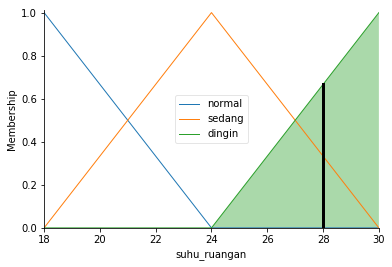

In [166]:
suhu_ruangan.view(sim=suhuac)

### jika disebuah ruangan terdapat 15 orang dengan suhu diluar ruangan 28

In [167]:
suhuac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
suhuac = ctrl.ControlSystemSimulation(suhuac_ctrl)
suhuac.input['jumlah_orang']=15
suhuac.input['suhu_eksternal']=28
suhuac.compute()
print(suhuac.output['suhu_ruangan'])

25.89713631156931


C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


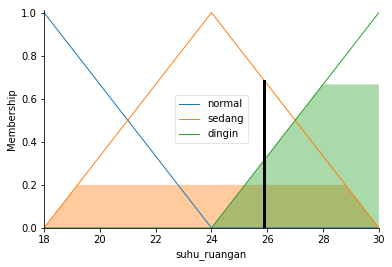

In [168]:
suhu_ruangan.view(sim=suhuac)

### jika disebuah ruangan terdapat 5 orang dengan suhu diluar ruangan 10

In [172]:
suhuac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
suhuac = ctrl.ControlSystemSimulation(suhuac_ctrl)
suhuac.input['jumlah_orang']=5
suhuac.input['suhu_eksternal']= 10
suhuac.compute()
print(suhuac.output['suhu_ruangan'])

20.0


C:\Users\cosmos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


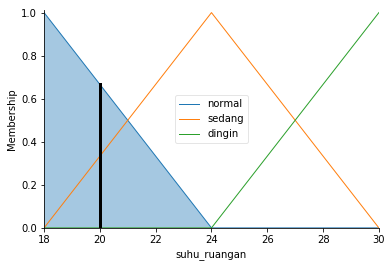

In [173]:
suhu_ruangan.view(sim=suhuac)